Our second objective is to classify those network attacks into different types such as DOS, Probe, U2R and R2L.

In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OneHotEncoder

# importing classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import auc, precision_score, recall_score

# Cross Validation, gridsearch
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,learning_curve, ShuffleSplit

from statsmodels.stats.outliers_influence import variance_inflation_factor

# For to feature selection
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif

# For faster processing
from sklearn.pipeline import Pipeline

#to scale numerical features
from sklearn.preprocessing import RobustScaler

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Setting the plot size for all the figures
plt.rcParams['figure.figsize']=(8,6)

In [ ]:
pd.set_option('display.max_columns',None)

### Importing the data from  KDDCUP’99 dataset

In [ ]:
# Column Names
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",  "wrong_fragment","urgent",
                "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
                "num_file_creations",  "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login",
                "count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
                "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


In [ ]:
# Train data
train_data = pd.read_table('/content/Train.txt',sep=',',header=None, names=column_names)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# Test data
test_data = pd.read_table('/content/Test.txt', sep=',', header=None, names=column_names)
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


### Data features and details

In [ ]:
print('The train data set has {} records and {} columns.'. format(train_data.shape[0], train_data.shape[1]))
print('The test data set has {} records and {} columns.'. format(test_data.shape[0], test_data.shape[1]))

The train data set has 125973 records and 43 columns.
The test data set has 22544 records and 43 columns.


In [ ]:
features = [c for c in train_data.columns if c not in 'attack']
print('The dataset contains {} features.'.format(len(features)))

The dataset contains 42 features.


#### Converting Variables to Binary Categorical Variables

In [ ]:
binary_vars = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

def categorize_binary_variables(df):
    for variable in binary_vars:
        df[variable] = df[variable].astype('category')
    return df[variable].dtypes


Converting to binary categorical variables for train dataset

In [ ]:
categorize_binary_variables(train_data)

CategoricalDtype(categories=[0, 1], ordered=False)

**Converting to binary categorical variables for test dataset**

In [ ]:
categorize_binary_variables(test_data)

CategoricalDtype(categories=[0, 1], ordered=False)

#### Continuous variables summary info

In [ ]:
# Data Summary for continuous variables:

def summarize_continuous_variable(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(),
                      x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.50),
                      x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     index=['N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 'P5', 'P10', 'P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])


In [ ]:
numerical_features = train_data.select_dtypes([np.number])
numerical_summary_train = numerical_features.apply(summarize_continuous_variable).T
numerical_summary_train

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,287.144650,0.00,2.604515e+03,6.783500e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,45566.743000,44.00,5.870331e+06,3.446079e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,19779.114421,0.00,4.021269e+06,1.617061e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
wrong_fragment,125973.0,0.0,2.858000e+03,0.022687,0.00,2.535300e-01,6.427745e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.000111,0.00,1.436603e-02,2.063827e-04,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.204409,0.00,2.149968e+00,4.622364e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.001222,0.00,4.523914e-02,2.046580e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.279250,0.00,2.394204e+01,5.732214e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03
num_root,125973.0,0.0,3.806800e+04,0.302192,0.00,2.439962e+01,5.953414e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.0,1.596000e+03,0.012669,0.00,4.839351e-01,2.341932e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.300000e+01


In [ ]:
numerical_features_test = test_data.select_dtypes([np.number])
numerical_summary_test = numerical_features_test.apply(summarize_continuous_variable).T
numerical_summary_test

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22544.0,0.0,4.933959e+06,218.859076,0.00,1407.176612,1.980146e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,4.00,283.00,7589.5700,57715.0
src_bytes,22544.0,0.0,2.343550e+08,10395.450231,54.00,472786.431088,2.235270e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.0000,1032.00,15876.00,283618.0000,62825648.0
dst_bytes,22544.0,0.0,4.635089e+07,2056.018808,46.00,21219.297609,4.502586e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.0000,4099.10,8314.00,26032.0400,1345927.0
wrong_fragment,22544.0,0.0,1.900000e+02,0.008428,0.00,0.142599,2.033441e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,3.0
urgent,22544.0,0.0,1.600000e+01,0.000710,0.00,0.036473,1.330286e-03,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,3.0
hot,22544.0,0.0,2.376000e+03,0.105394,0.00,0.928428,8.619786e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,2.0000,101.0
num_failed_logins,22544.0,0.0,4.880000e+02,0.021647,0.00,0.150328,2.259843e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,1.0000,4.0
num_compromised,22544.0,0.0,2.703000e+03,0.119899,0.00,7.269597,5.284704e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,1.0000,796.0
num_root,22544.0,0.0,2.585000e+03,0.114665,0.00,8.041614,6.466755e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,878.0
num_file_creations,22544.0,0.0,1.970000e+02,0.008738,0.00,0.676842,4.581146e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,100.0


In [ ]:
# Summary Statistics for Categorical Variables in Train data
train_description_non_numeric = train_data.describe(exclude=[np.number])
train_description_non_numeric

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,2,2,3,2,2,23
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,76121,125804,125893,125972,124786,67343


In [ ]:
# Summary Statistics for Categorical Variables in Test data
test_description_non_numeric = test_data.describe(exclude=[np.number])
test_description_non_numeric

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,22544,22544,22544,22544,22544,22544,22544,22544,22544,22544
unique,3,64,11,2,2,2,3,2,2,38
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,18880,7853,14875,22537,12575,22489,22540,22533,21903,9711


From the summary statistics we see num_outbound_cmds has no value. It has only 0 values, hence dropping the column from both the train and test data.

In [ ]:
train_data.num_outbound_cmds.value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [ ]:
test_data.num_outbound_cmds.value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [ ]:
# Removing num_outbound_cmds from train set
train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
# Removing num_outbound_cmds from test set
test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

#### Handling missing values

In [ ]:
# checking for null values in train data

absences = train_data.isnull().sum()

count = len(train_data)

percent = (absences/count)*100

missing_values_train = pd.concat([absences, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_train = missing_values_train.sort_values('Count of Missing Values',ascending=False)
missing_values_train

,Count of Missing Values,Percentage of Missing Values
duration,0,0.0
dst_host_srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0
dst_host_count,0,0.0


In [ ]:
# checking for null values in test data

absences = test_data.isnull().sum()

count = len(test_data)

percent = (absences/count)*100

missing_values_test = pd.concat([absences, percent],axis=1, keys= ['Count of Missing Values', 'Percentage of Missing Values'])
missing_values_test = missing_values_test.sort_values('Count of Missing Values',ascending=False)
missing_values_test

,Count of Missing Values,Percentage of Missing Values
duration,0,0.0
dst_host_srv_count,0,0.0
serror_rate,0,0.0
srv_serror_rate,0,0.0
rerror_rate,0,0.0
srv_rerror_rate,0,0.0
same_srv_rate,0,0.0
diff_srv_rate,0,0.0
srv_diff_host_rate,0,0.0
dst_host_count,0,0.0


No missing values found in both the training and testing datasets.

#### Identifying the different Variable Types - numerical, categorical, Binary

In [ ]:
# Numerical Variables:
numerical_features = train_data.dtypes[(train_data.dtypes == 'int64') | (train_data.dtypes == 'float64')].index.to_list()
print(numerical_features)

['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']


In [ ]:
# Categorical Variables:

categorical_features = train_data.dtypes[train_data.dtypes == 'object'].index.to_list()
print(categorical_features)

['protocol_type', 'service', 'flag', 'attack']


In [ ]:
# Binary Variables:

binary_features = train_data.dtypes[train_data.dtypes == 'category'].index.to_list()
print(binary_features)

['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']



After examining the distinct categories in the Test and Train datasets, it's evident that the test dataset lacks 6 categories. We'll identify and incorporate them into the test dataset. Regarding the attack column, there are 15 absent categories in the test dataset. Nonetheless, during the labeling of 1s and 0s for the attack column to create the Target column, we'll address the missing categories at that point.

In [ ]:
train_data.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,125973,125973,125973,125973,125973,125973,125973,125973,125973,125973
unique,3,70,11,2,2,2,3,2,2,23
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,102689,40338,74945,125948,76121,125804,125893,125972,124786,67343


In [ ]:
test_data.describe(exclude=[np.number])

,protocol_type,service,flag,land,logged_in,root_shell,su_attempted,is_host_login,is_guest_login,attack
count,22544,22544,22544,22544,22544,22544,22544,22544,22544,22544
unique,3,64,11,2,2,2,3,2,2,38
top,tcp,http,SF,0,0,0,0,0,0,normal
freq,18880,7853,14875,22537,12575,22489,22540,22533,21903,9711


In [ ]:
service_train = train_data.service.value_counts().index.to_list()
service_test = test_data.service.value_counts().index.to_list()

In [ ]:
# Missing Categories in Serivce column:
missing_categories = list(filter(lambda x: x not in service_test, service_train))
missing_categories

['urh_i', 'red_i', 'http_8001', 'aol', 'harvest', 'http_2784']

The above six categories are missing in the Test dataset under the Service column. However, we can not add directly add to the test data in the present form of the Test data set. We shall add these post the data preprocessing step of creating dummy variables.

In [ ]:
attack_train = list(train_data.attack.value_counts().index)
attack_test = list(test_data.attack.value_counts().index)

In [ ]:
# Missing Categories in Attack column:
missing_attack_cat = list(filter(lambda x: x not in attack_test, attack_train))
missing_attack_cat

['warezclient', 'spy']

### Target Variables for different classes

In this case, will have 5 classes where the activity is defined as: normal, DoS, Probe, R2L, U2R. Hence, the target variable will have Labels as 0,1,2,3,4 where 1 is normal.

In [ ]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
           'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
           'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
           'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
           'sqlattack': 'U2R','httptunnel': 'U2R',
           'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
           'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
           'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
           'normal': 'Normal'
          }

In [ ]:
#Let's map different attack classes in the data.

train_data['attack_type'] = train_data.attack.apply(lambda x: mapping[x])
test_data['attack_type'] = test_data.attack.apply(lambda x : mapping[x])

In [ ]:
train_data[['attack','attack_type']]

,attack,attack_type
0,normal,Normal
1,normal,Normal
2,neptune,DoS
3,normal,Normal
4,normal,Normal
...,...,...
125968,neptune,DoS
125969,normal,Normal
125970,normal,Normal
125971,neptune,DoS


In [ ]:
# Creating Label for Train and Test dataset
label_dict = {'DoS':0, 'Normal':1, 'Probe':2, 'R2L':3, 'U2R':4}

In [ ]:
# Applying Label for Train and Test dataset:

train_data['Label'] = train_data.attack_type.apply(lambda x: label_dict[x])
test_data['Label'] = test_data.attack_type.apply(lambda x : label_dict[x])

In [ ]:
train_data[['attack_type','Label']].tail(10)

,attack_type,Label
125963,Normal,1
125964,DoS,0
125965,Normal,1
125966,DoS,0
125967,Normal,1
125968,DoS,0
125969,Normal,1
125970,Normal,1
125971,DoS,0
125972,Normal,1


### Target Distribtuion

In [ ]:
# Attack Class Distribution
attack_type_freq_train = train_data[['attack_type']].apply(lambda x: x.value_counts())
attack_type_freq_test = test_data[['attack_type']].apply(lambda x: x.value_counts())

attack_type_freq_train['frequency_percent_train'] = attack_type_freq_train.apply(lambda x: round((100 * x / x.sum()), 2))
attack_type_freq_test['frequency_percent_test'] = attack_type_freq_test.apply(lambda x: round((100 * x / x.sum()), 2))

attack_type_distribution = pd.concat([attack_type_freq_train, attack_type_freq_test], axis=1)
attack_type_distribution

,attack_type,frequency_percent_train,attack_type,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


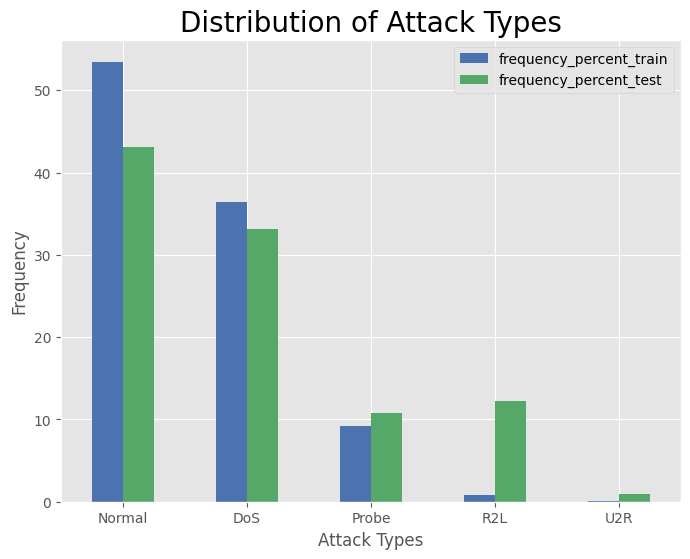

In [ ]:
# Train test bar plot for each attack type

attack_type_distribution[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar", color=('#4c72b0', '#55a868'))
plt.title("Distribution of Attack Types", fontsize=20)
plt.xticks(rotation=0)
plt.xlabel('Attack Types')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Dropping the attack variable from the train and test data
#prakash comeback
# train_data.drop(['attack'], inplace=True, axis=1)
# test_data.drop(['attack'], inplace=True, axis=1)

In [ ]:
# Dropping the attack_type variable from the train and test data
train_data.drop(['attack_type'], inplace=True, axis=1)
test_data.drop(['attack_type'], inplace=True, axis=1)

In [ ]:
Y = train_data['Label']
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Label, dtype: int64

In [ ]:
Y_test = test_data['Label']
Y_test.head()

0    0
1    0
2    1
3    2
4    2
Name: Label, dtype: int64

### Exploratory Data Analysis

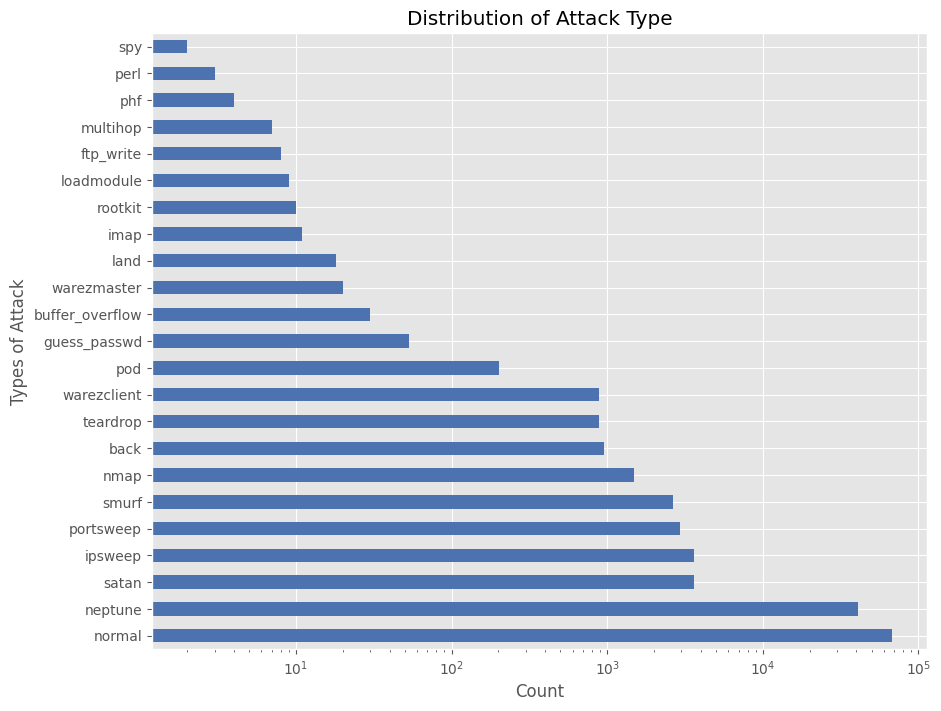

In [ ]:
#plotting count for each attack class
plt.figure(figsize=(10, 8))
plt.xscale("log")
train_data.attack.value_counts().plot(kind='barh', color='#4c72b0')
plt.xlabel('Count')
plt.ylabel('Types of Attack')
plt.title('Distribution of Attack Type')
plt.show()

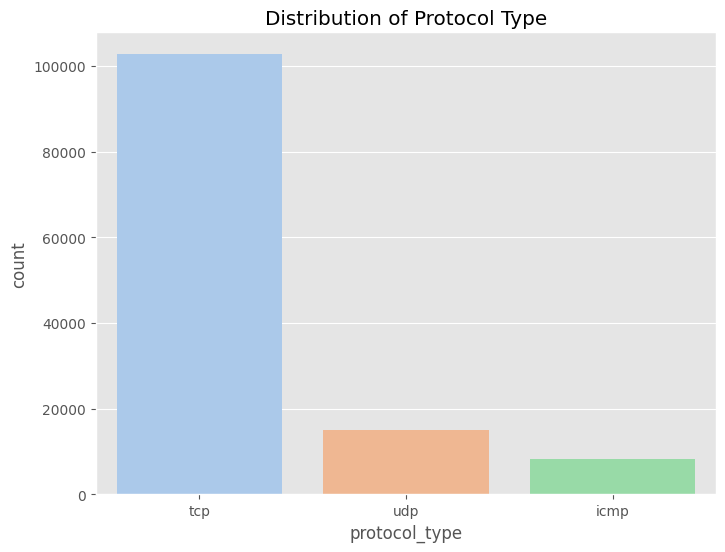

In [ ]:
# To observe how each ptocol type is distributed
sns.countplot(data=train_data, x='protocol_type', palette='pastel')
plt.title('Distribution of Protocol Type')
plt.show()

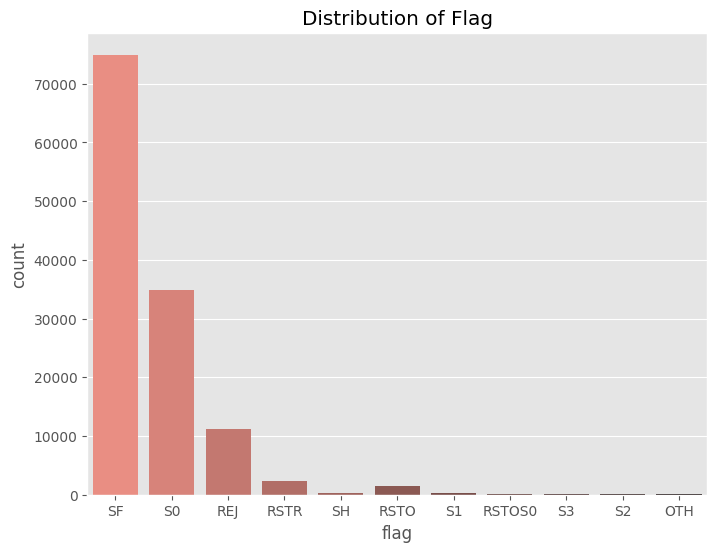

In [ ]:
#to observe how flags are distributed
sns.countplot(data=train_data, x='flag', palette='dark:salmon_r')
plt.title('Distribution of Flag')
plt.show()

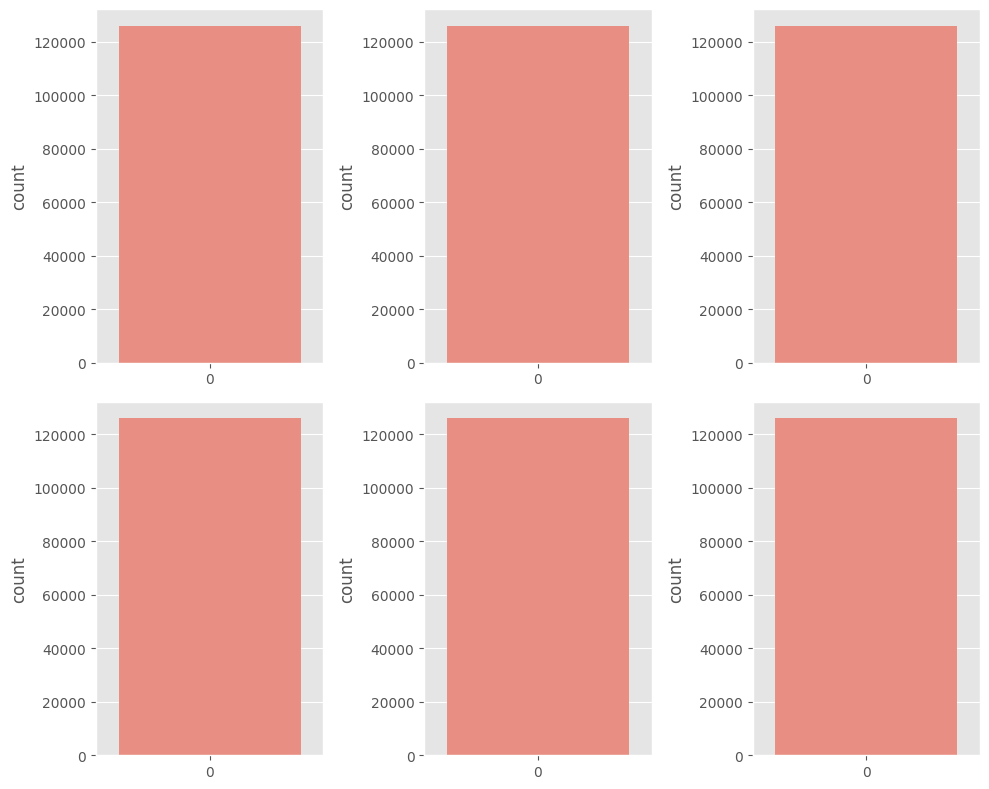

In [ ]:
# Subplots for each binary categorical feature
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

for variable, subplot in zip(binary_vars, ax.flatten()):
    sns.countplot(train_data[variable], ax=subplot, palette='dark:salmon_r')
    plt.tight_layout()

plt.show()

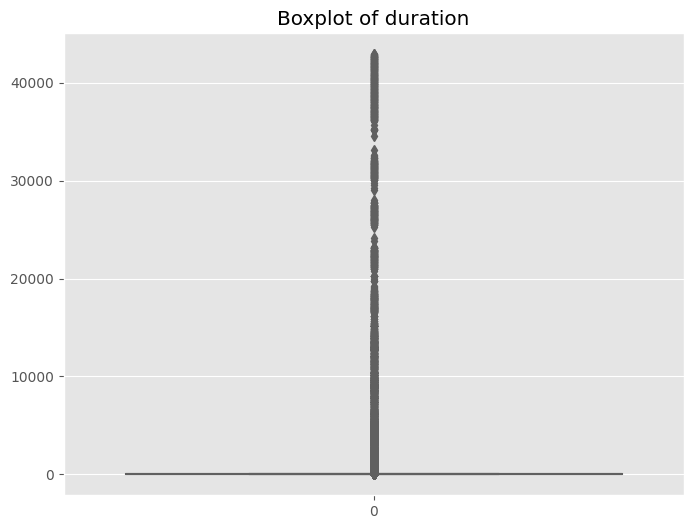

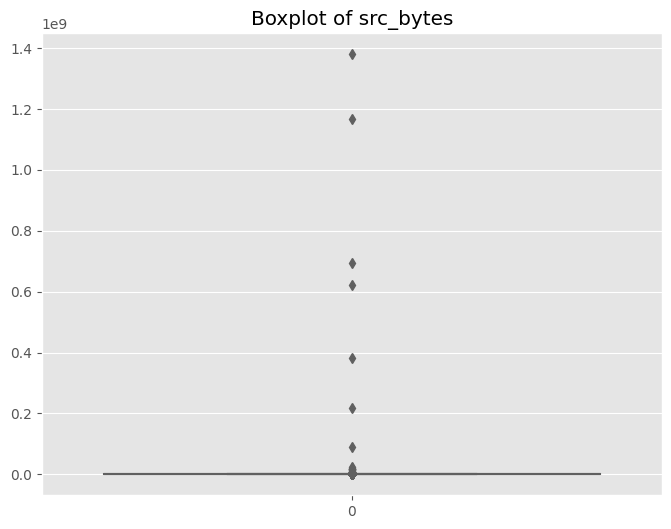

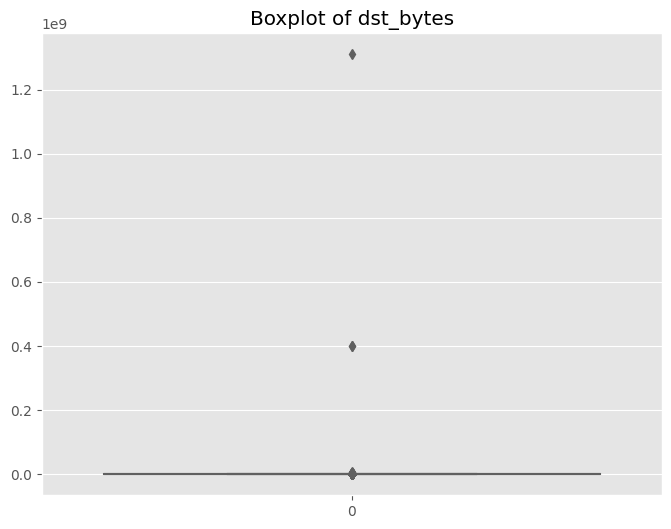

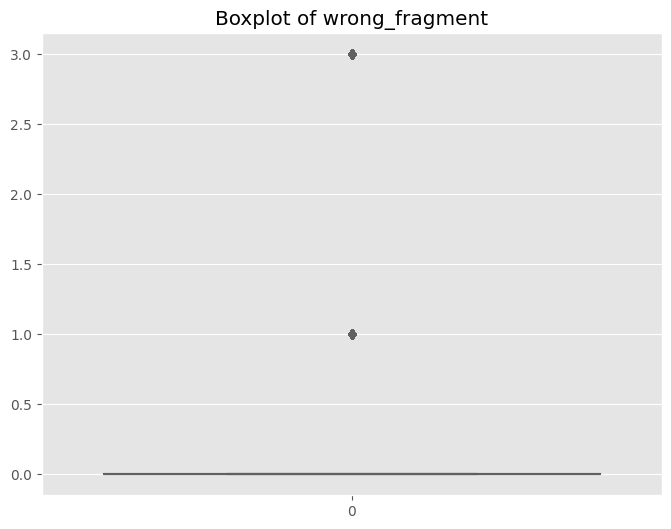

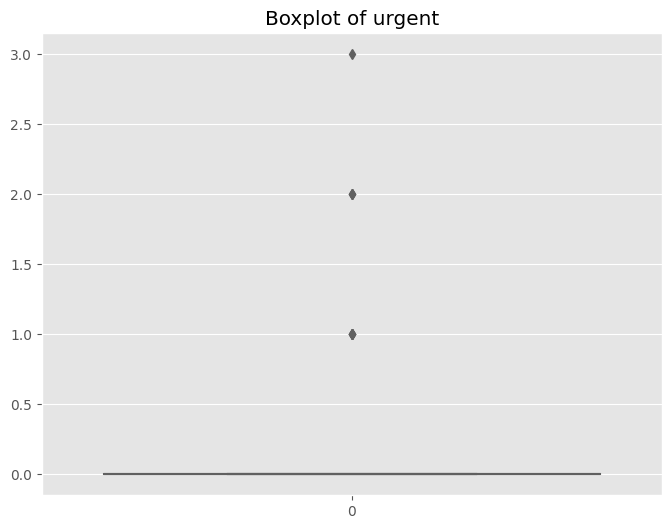

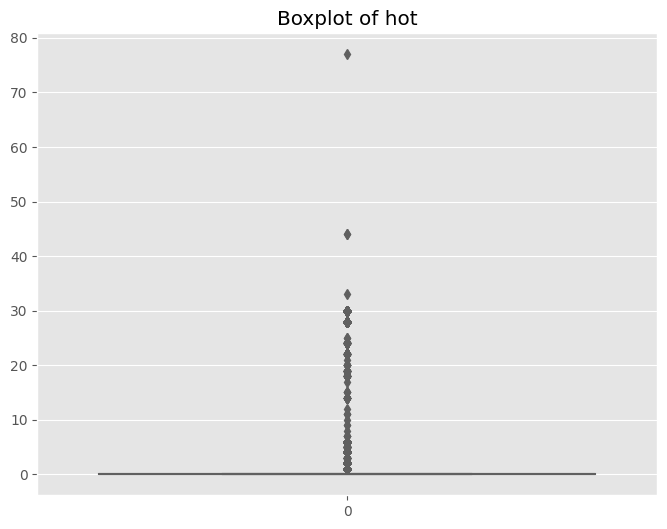

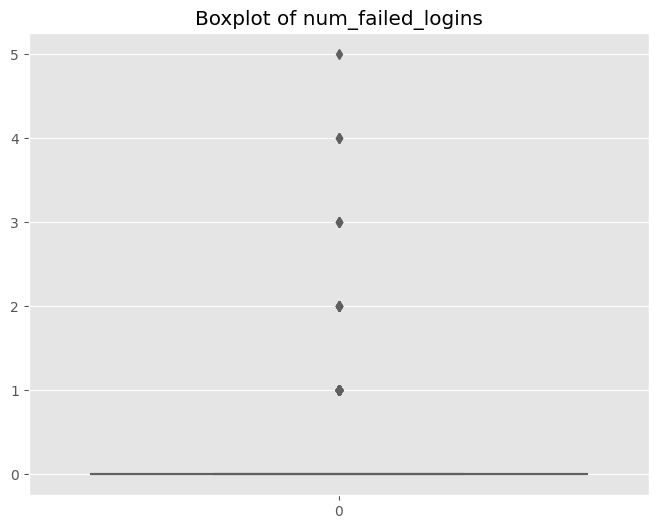

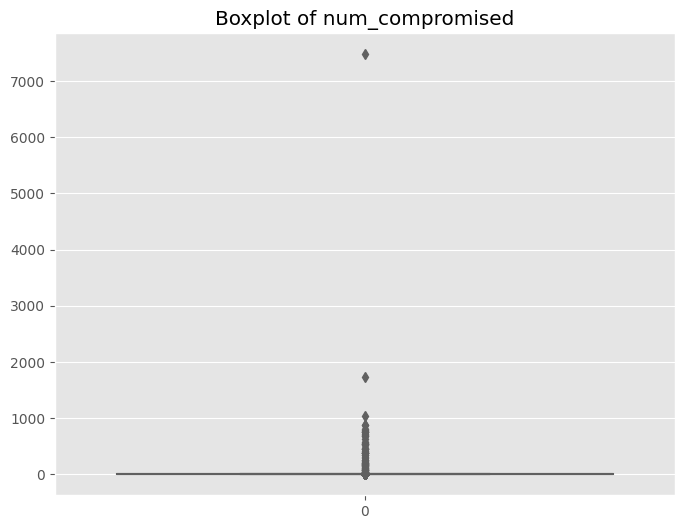

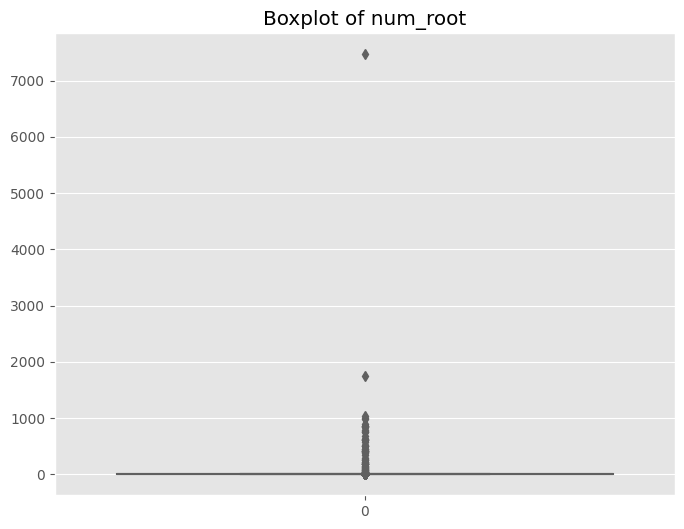

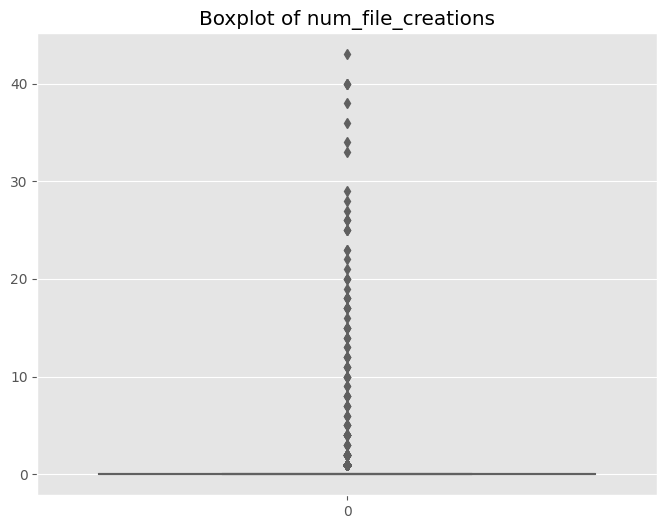

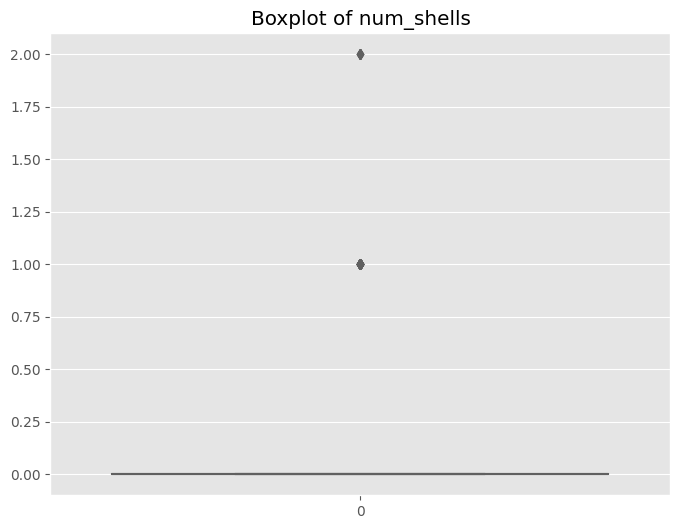

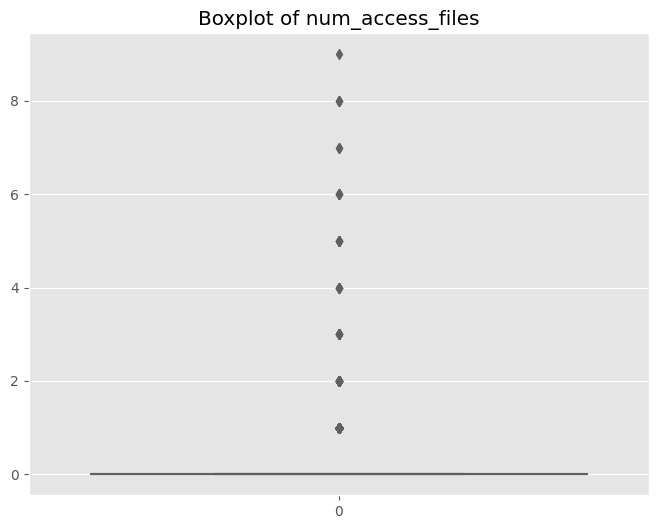

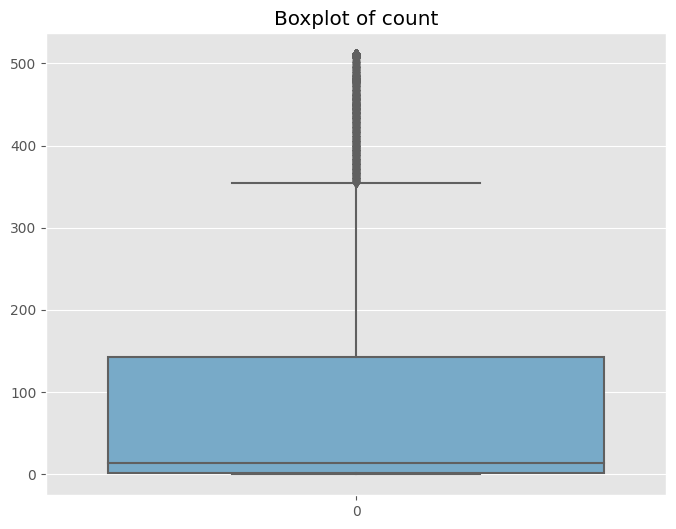

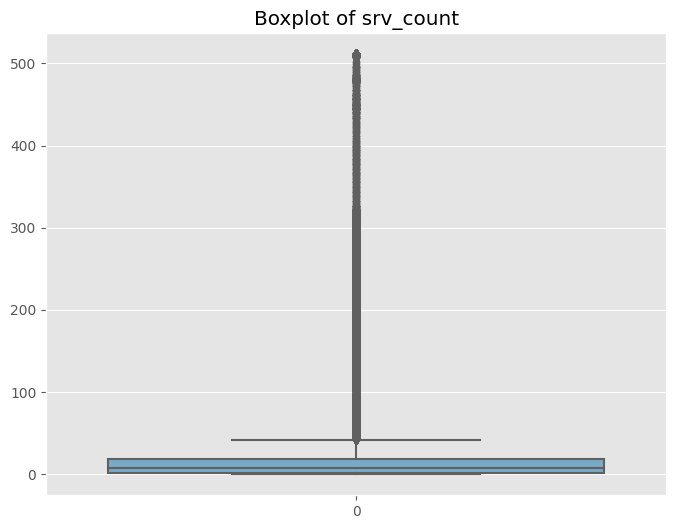

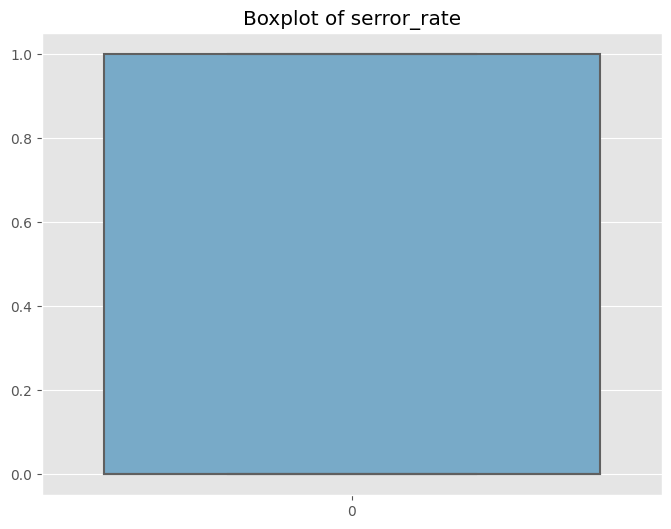

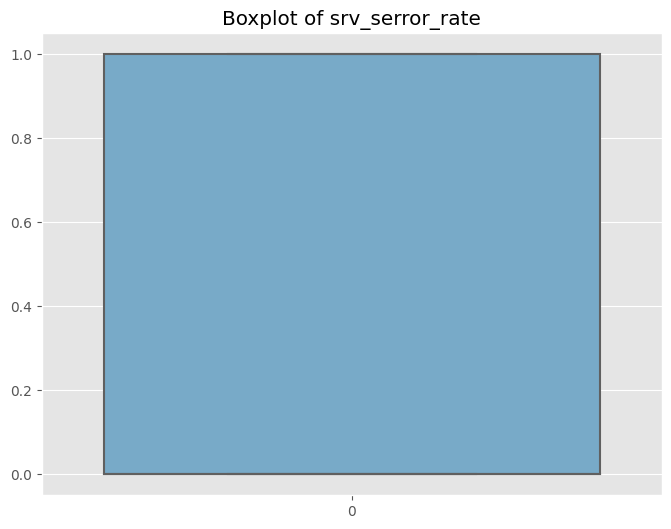

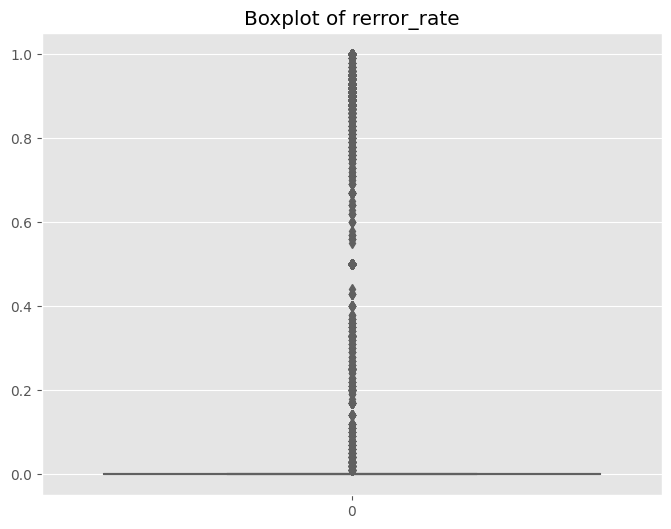

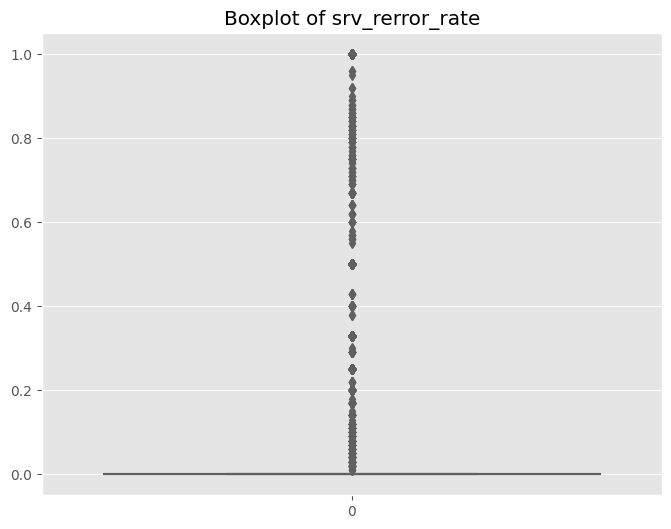

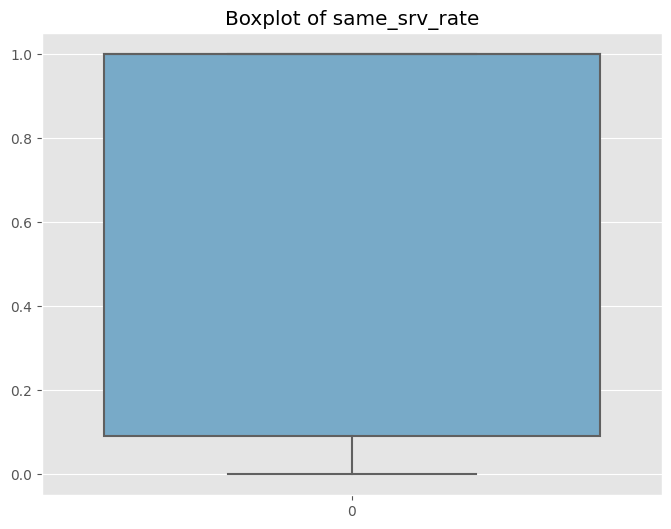

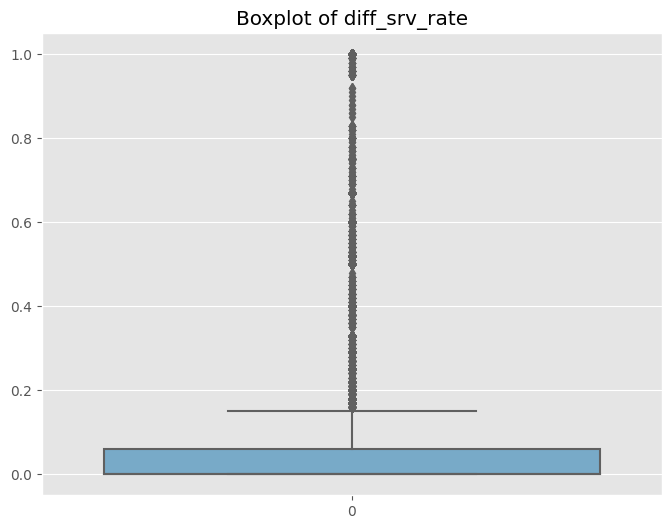

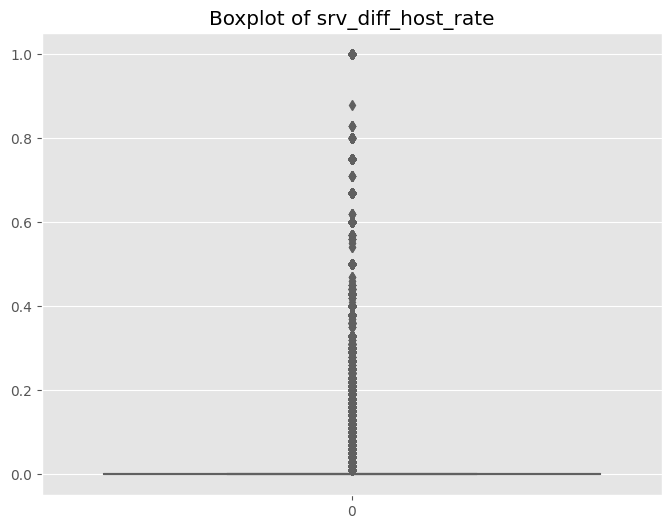

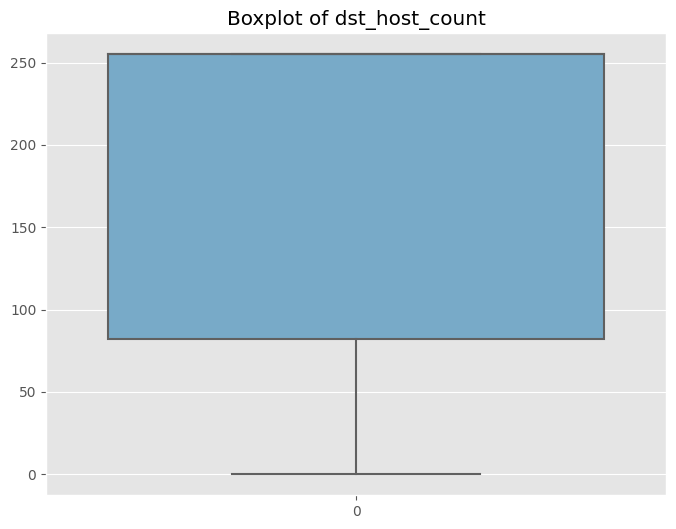

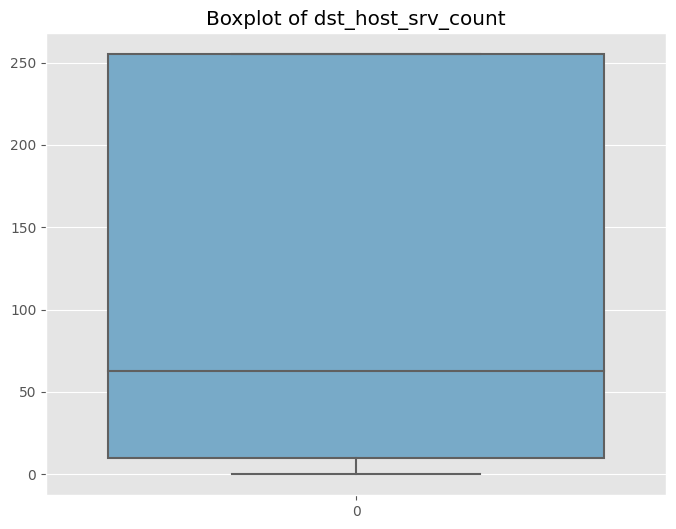

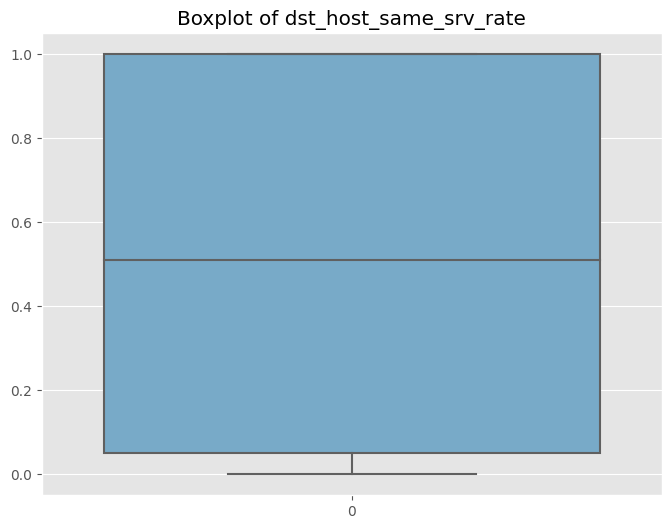

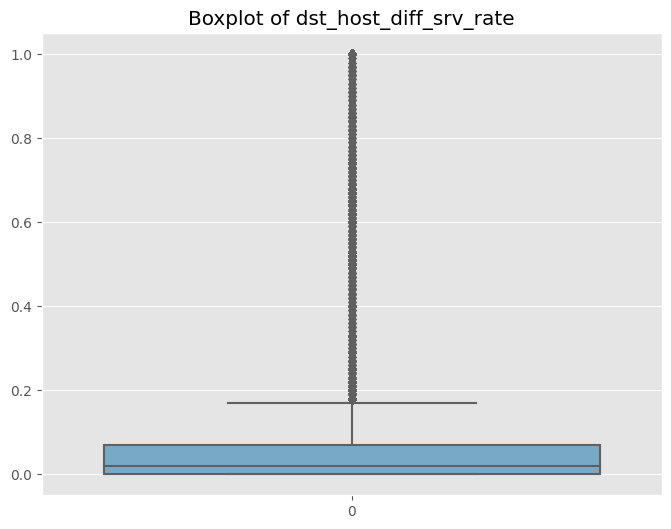

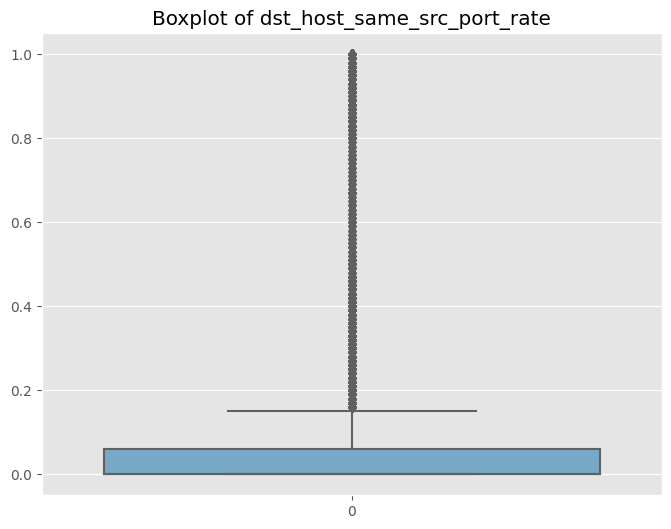

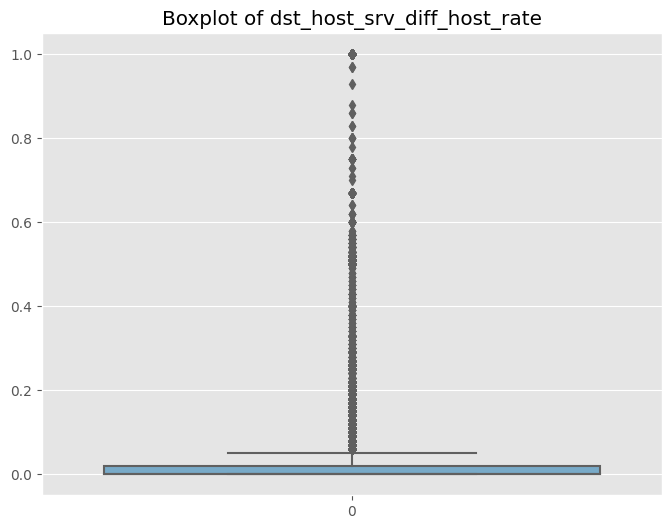

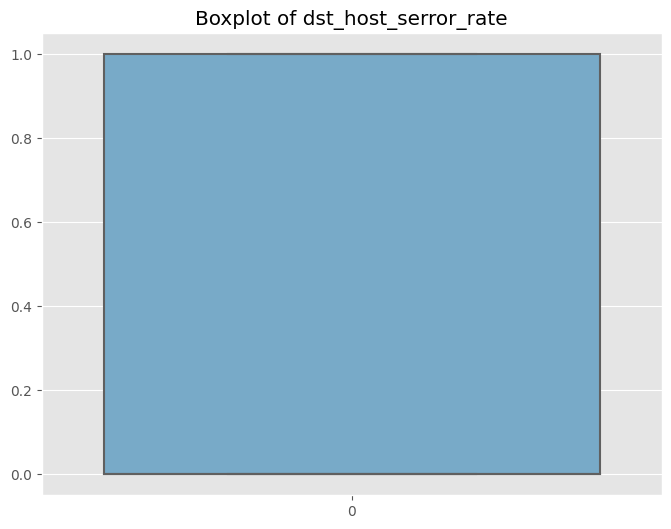

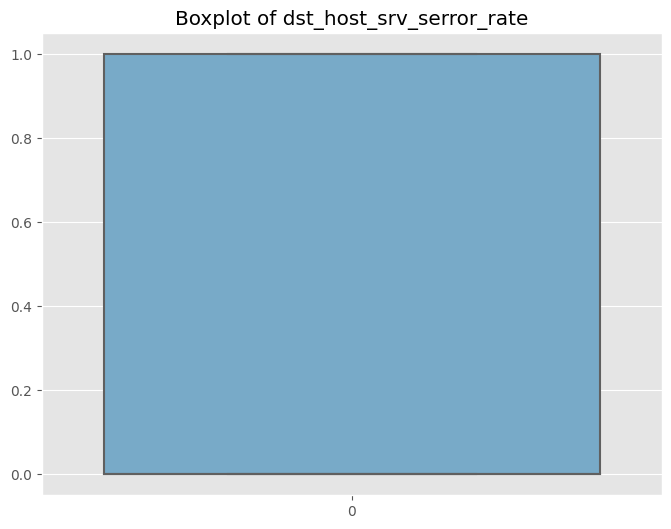

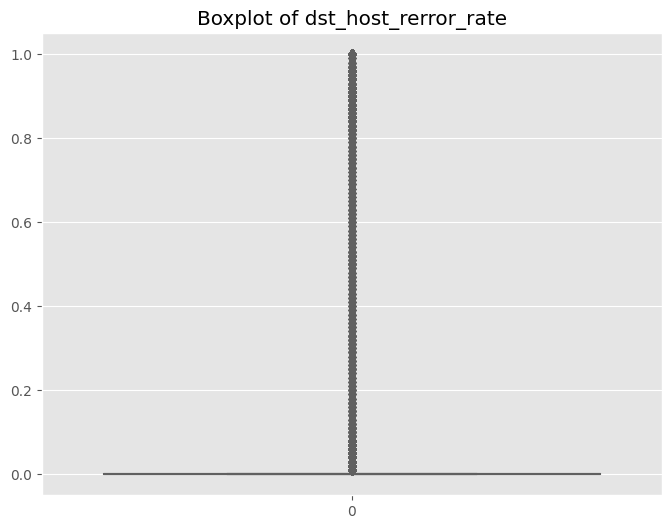

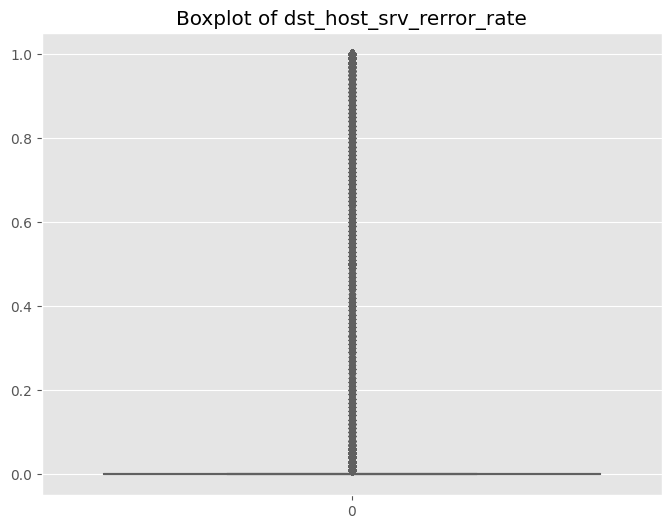

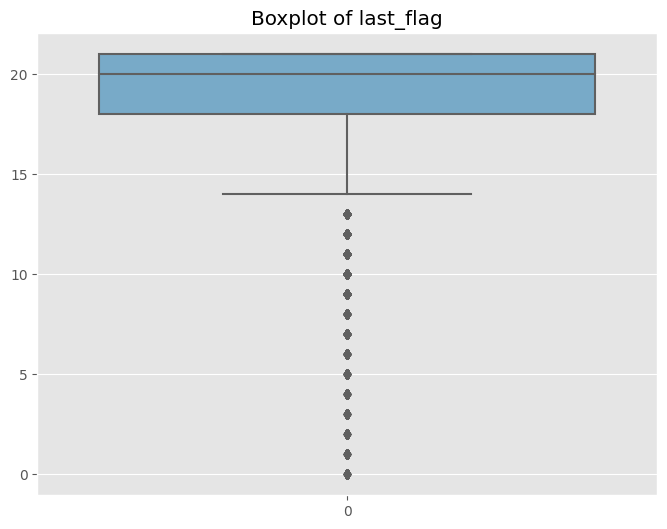

In [ ]:
#box plot of each individual feature
plt.rcParams['figure.figsize'] = (8, 6)

for variable in numerical_features:
    sns.boxplot(train_data[variable], palette='Blues')
    plt.title('Boxplot of {}'.format(variable))
    plt.show()

The boxplots above reveal the existence of outliers. Despite their presence, opting to retain them since the values predominantly fall between 0 and 1. Capping these outliers could potentially result in inaccurate predictions.

#### Scaling of numerical Features

In [ ]:
#Scaling numerical features using Robust Scaler
robust_scaler = RobustScaler()
num_scaled = robust_scaler.fit_transform(train_data[numerical_features])
df_num_scaled = pd.DataFrame(num_scaled, columns=numerical_features).reset_index(drop=True)

#### OneHotEncoding of categorical features - protocol type, service, flag



In [ ]:
# Create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical features
x_dummy_encoded = onehot_encoder.fit_transform(train_data[['protocol_type', 'service', 'flag']])
column_names = onehot_encoder.get_feature_names_out(['protocol_type', 'service', 'flag'])
x_dummy_encoded = pd.DataFrame(x_dummy_encoded, columns=column_names, index=train_data.index)
x_dummy_encoded = x_dummy_encoded.reset_index(drop=True)

In [ ]:
x_binary_features = train_data[binary_features]

x_binary_features = x_binary_features.reset_index(drop=True)

#### Using join to concatenate all the binary features, dummy and scaled dataset

In [ ]:
x_final = df_num_scaled.join(x_dummy_encoded).join(x_binary_features)
x_final.shape

(125973, 119)

#### Applying the similar preprocessing steps on the Test Data as did for Train data

In [ ]:
# Scaling the numerical variables
robust_scaler = RobustScaler()
num_scaled_test = robust_scaler.fit_transform(test_data[numerical_features])
df_num_scaled_test = pd.DataFrame(num_scaled_test, columns=numerical_features).reset_index(drop=True)

In [ ]:
# Create an instance of the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the categorical features in the test_data
x_dummy_test_encoded = onehot_encoder.fit_transform(test_data[['protocol_type', 'service', 'flag']])
column_names_test = onehot_encoder.get_feature_names_out(['protocol_type', 'service', 'flag'])
x_dummy_test = pd.DataFrame(x_dummy_test_encoded, columns=column_names_test, index=test_data.index)

In [ ]:
x_binary_test = test_data[binary_features]
x_binary_test = x_binary_test.reset_index(drop=True)

#### Using join to concatenate all the binary features, dummy and scaled for test data

In [ ]:
x_final_test = df_num_scaled_test.join(x_dummy_test).join(x_binary_test)
x_final_test.shape

(22544, 113)

#### Adding the six missing  service categories in the Test dataset

In [ ]:
# the missing categories are
print("the missing categories are", missing_categories)

the missing categories are ['urh_i', 'red_i', 'http_8001', 'aol', 'harvest', 'http_2784']


In [ ]:
# appending string services_ infront of each missing category -
string = 'service_'
missing_categories = list(map(lambda x: string + x, missing_categories))
missing_categories

['service_urh_i',
 'service_red_i',
 'service_http_8001',
 'service_aol',
 'service_harvest',
 'service_http_2784']

In [ ]:
# Adding the missing categories column to the test data -
for col in missing_categories:
    x_final_test[col] = 0

x_final_test.shape

(22544, 119)

### Building Model on All the features

In [ ]:
missing_categories

['service_urh_i',
 'service_red_i',
 'service_http_8001',
 'service_aol',
 'service_harvest',
 'service_http_2784']

In [ ]:
# Logistic Regression
LR = LogisticRegression(n_jobs=-1, random_state = 0)

columns_order = x_final.columns

# Reorder the columns in x_final_test
x_final_test = x_final_test[columns_order]

# columns_order = x_final.columns

# Reorder the columns in x_final_test
# Ensure columns in x_final_test are in the same order as x_final
# x_final_test = x_final_test[x_final.columns]


LR.fit(x_final, Y)
LR_pred = LR.predict(x_final_test)

# Decision Tree
DT_full = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DT_full.fit(x_final, Y)
dt_pred = DT_full.predict(x_final_test)

# Random Forest
RF = RandomForestClassifier(n_estimators = 51, criterion = 'entropy', random_state = 0)
RF.fit(x_final, Y)
RF_pred = RF.predict(x_final_test)

# K-Nearest Neighbor
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors = 8)
knn.fit(x_final, Y)
knn_pred = knn.predict(x_final_test)

# Bernoulli Naive Bayes
NB = BernoulliNB()
NB.fit(x_final, Y)
NB_pred = NB.predict(x_final_test)

In [ ]:
# Ada Boost
AB = AdaBoostClassifier(n_estimators=51,random_state=0)
AB.fit(x_final, Y)
AB_pred = AB.predict(x_final_test)

# Gradient Boosting Boost
GB = GradientBoostingClassifier(n_estimators=100,random_state=0)
GB.fit(x_final, Y)
GB_pred = GB.predict(x_final_test)

In [ ]:
# Ensemble Model (Voting Classifier)
voting_clf = VotingClassifier(estimators=[('LR', LR), ('DT', DT_full), ('RF', RF), ('knn', knn), ('NB', NB), ('AB', AB),('GB', GB)], voting='soft')
voting_clf.fit(x_final, Y)
voting_pred = voting_clf.predict(x_final_test)

### Model Evaluation

In case of Network Intrusion Dectection system, we have to reduce the false negatives that is we have to be careful that a network that is actually an attack is not predicted as safe. For this, we must aim for high Recall and Low Precision.

In [ ]:
print('************ Model Evaluation of Logistic Regression *****************')
print('')
accuracy_LR = accuracy_score(Y_test, LR_pred)
print('Accuracy Score of Logistic Tree:',accuracy_LR)
print('')

precision_score_lr = precision_score(Y_test, LR_pred, average='weighted')
print('Precision Score:',precision_score_lr)
print('')

recall_score_lr = recall_score(Y_test, LR_pred, average='weighted')
print('Recall Score:',recall_score_lr)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, LR_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, LR_pred))
print('')

************ Model Evaluation of Logistic Regression *****************

Accuracy Score of Logistic Tree: 0.6902945351312988

Precision Score: 0.6101726723242747

Recall Score: 0.6902945351312988

Confusion Matrix:
[[5076 2166  216    0    0]
 [  60 9259  391    1    0]
 [ 996  198 1227    0    0]
 [  70 2352  332    0    0]
 [ 116   66   18    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74      7458
           1       0.66      0.95      0.78      9711
           2       0.56      0.51      0.53      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.69     22544
   macro avg       0.40      0.43      0.41     22544
weighted avg       0.61      0.69      0.64     22544




In [ ]:
print('********** Model Evaluation of Decision Tree **************************')
print('')
accuracy_dt = accuracy_score(Y_test,dt_pred)
print('Accuracy Score of Decision Tree:',accuracy_dt)
print('')

precision_score_DT = precision_score(Y_test, dt_pred, average='weighted')
print('Precision Score:',precision_score_DT)
print('')

recall_score_DT = recall_score(Y_test, dt_pred, average='weighted')
print('Recall Score:',recall_score_DT)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, dt_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, dt_pred))
print('')

********** Model Evaluation of Decision Tree **************************

Accuracy Score of Decision Tree: 0.75

Precision Score: 0.7805000929656776

Recall Score: 0.75

Confusion Matrix:
[[5659 1201  598    0    0]
 [ 136 9085  482    8    0]
 [ 720    7 1692    0    2]
 [ 168 1424  679  464   19]
 [  42  101   34   15    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      7458
           1       0.77      0.94      0.84      9711
           2       0.49      0.70      0.57      2421
           3       0.95      0.17      0.29      2754
           4       0.28      0.04      0.07       200

    accuracy                           0.75     22544
   macro avg       0.66      0.52      0.51     22544
weighted avg       0.78      0.75      0.72     22544




In [ ]:
print('******************Model Evaluation of Random Forest *******************')
print('')
accuracy_RF = accuracy_score(Y_test, RF_pred)
print('Accuracy Score of Random Forest:',accuracy_RF)
print('')

precision_score_RF = precision_score(Y_test, RF_pred, average='weighted')
print('Precision Score:',precision_score_RF)
print('')

recall_score_RF = recall_score(Y_test, RF_pred, average='weighted')
print('Recall Score:',recall_score_RF)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, RF_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, RF_pred))
print('')

******************Model Evaluation of Random Forest *******************

Accuracy Score of Random Forest: 0.7708037615330021

Precision Score: 0.8185735529873039

Recall Score: 0.7708037615330021

Confusion Matrix:
[[5985 1286  187    0    0]
 [ 102 9395  214    0    0]
 [ 306  122 1993    0    0]
 [   1 2627  123    1    2]
 [   0  145   52    0    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7458
           1       0.69      0.97      0.81      9711
           2       0.78      0.82      0.80      2421
           3       1.00      0.00      0.00      2754
           4       0.60      0.01      0.03       200

    accuracy                           0.77     22544
   macro avg       0.80      0.52      0.50     22544
weighted avg       0.82      0.77      0.72     22544




In [ ]:
print('****************** Model Evaluation of K-Nearest Neighbor *************')
print('')
accuracy_knn = accuracy_score(Y_test, knn_pred)
print('Accuracy Score of K-Nearest Neighbor:',accuracy_knn)
print('')

precision_score_knn = precision_score(Y_test, knn_pred, average='weighted')
print('Precision Score:',precision_score_knn)
print('')

recall_score_knn = recall_score(Y_test, knn_pred, average='weighted')
print('Recall Score:',recall_score_knn)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, knn_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, knn_pred))
print('')

****************** Model Evaluation of K-Nearest Neighbor *************

Accuracy Score of K-Nearest Neighbor: 0.7608676366217175

Precision Score: 0.7946492463953863

Recall Score: 0.7608676366217175

Confusion Matrix:
[[5814 1589   55    0    0]
 [  39 9433  234    5    0]
 [ 268  336 1812    5    0]
 [   3 2374  283   94    0]
 [  59  114   26    1    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7458
           1       0.68      0.97      0.80      9711
           2       0.75      0.75      0.75      2421
           3       0.90      0.03      0.07      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.76     22544
   macro avg       0.65      0.51      0.49     22544
weighted avg       0.79      0.76      0.72     22544




In [ ]:
print('************** Model Evaluation of Naive Bayes ***********************')
accuracy_NB = accuracy_score(Y_test,NB_pred)
print('Accuracy Score of Naive Bayes:',accuracy_NB)
print('')

precision_score_NB = precision_score(Y_test, NB_pred, average='weighted')
print('Precision Score:',precision_score_NB)
print('')

recall_score_NB = recall_score(Y_test, NB_pred, average='weighted')
print('Recall Score:',recall_score_NB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, NB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, NB_pred))
print('')

************** Model Evaluation of Naive Bayes ***********************
Accuracy Score of Naive Bayes: 0.7328779276082328

Precision Score: 0.7882719769940814

Recall Score: 0.7328779276082328

Confusion Matrix:
[[4105 1739 1614    0    0]
 [  10 9069  416  204   12]
 [ 356    1 2064    0    0]
 [   0 1094  403 1245   12]
 [   0   14  123   24   39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      7458
           1       0.76      0.93      0.84      9711
           2       0.45      0.85      0.59      2421
           3       0.85      0.45      0.59      2754
           4       0.62      0.20      0.30       200

    accuracy                           0.73     22544
   macro avg       0.72      0.60      0.60     22544
weighted avg       0.79      0.73      0.73     22544




In [ ]:
print('********************* Model Evaluation of Ada Boost ******************')
accuracy_AB = accuracy_score(Y_test, AB_pred)
print('Accuracy Score of Ada Boost:',accuracy_AB)
print('')

precision_score_AB = precision_score(Y_test, AB_pred, average='weighted')
print('Precision Score:',precision_score_AB)
print('')

recall_score_AB = recall_score(Y_test, AB_pred, average='weighted')
print('Recall Score:',recall_score_AB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, AB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, AB_pred))
print('')

********************* Model Evaluation of Ada Boost ******************
Accuracy Score of Ada Boost: 0.6395936834634492

Precision Score: 0.7449346361619369

Recall Score: 0.6395936834634492

Confusion Matrix:
[[3361 2472 1625    0    0]
 [  79 9179  451    2    0]
 [ 278  385 1758    0    0]
 [   2 1480 1154  104   14]
 [   0  168   10    5   17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.45      0.60      7458
           1       0.67      0.95      0.78      9711
           2       0.35      0.73      0.47      2421
           3       0.94      0.04      0.07      2754
           4       0.55      0.09      0.15       200

    accuracy                           0.64     22544
   macro avg       0.68      0.45      0.42     22544
weighted avg       0.74      0.64      0.60     22544




In [ ]:
print('****************** Model Evaluation of Gradient Boosting **************')
accuracy_GB = accuracy_score(Y_test, GB_pred)
print('Accuracy Score of Gradient Boosting:',accuracy_GB)
print('')

precision_score_GB = precision_score(Y_test, GB_pred, average='weighted')
print('Precision Score:',precision_score_GB)
print('')

recall_score_GB = recall_score(Y_test, GB_pred, average='weighted')
print('Recall Score:',recall_score_GB)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, GB_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, GB_pred))
print('')

****************** Model Evaluation of Gradient Boosting **************
Accuracy Score of Gradient Boosting: 0.7922285308729595

Precision Score: 0.8248117362868485

Recall Score: 0.7922285308729595

Confusion Matrix:
[[6089 1089  280    0    0]
 [  67 9373  267    4    0]
 [ 260   38 2122    1    0]
 [   1 2234  240  259   20]
 [   2   89   83    9   17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7458
           1       0.73      0.97      0.83      9711
           2       0.71      0.88      0.78      2421
           3       0.95      0.09      0.17      2754
           4       0.46      0.09      0.14       200

    accuracy                           0.79     22544
   macro avg       0.76      0.57      0.56     22544
weighted avg       0.82      0.79      0.76     22544




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print('****************** Model Evaluation of Voting classifier **************')

# Calculate accuracy
accuracy_VC = accuracy_score(Y_test, voting_pred)
print('Accuracy Score of Voting Classifier:', accuracy_VC)
print('')

# Calculate precision
precision_score_vc = precision_score(Y_test, voting_pred, average='weighted')
print('Precision Score:', precision_score_vc)
print('')

# Calculate recall
recall_score_vc = recall_score(Y_test, voting_pred, average='weighted')
print('Recall Score:', recall_score_vc)
print('')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, voting_pred))
print('')

# Display classification report
print('Classification Report:')
print(classification_report(Y_test, voting_pred))
print('')


****************** Model Evaluation of Voting classifier **************
Accuracy Score of Voting Classifier: 0.7681866572036906

Precision Score: 0.8105110907803437

Recall Score: 0.7681866572036906

Confusion Matrix:
[[5726 1406  326    0    0]
 [  47 9343  318    3    0]
 [ 289   10 2122    0    0]
 [   0 2377  253  117    7]
 [  30  100   57    3   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      7458
           1       0.71      0.96      0.81      9711
           2       0.69      0.88      0.77      2421
           3       0.95      0.04      0.08      2754
           4       0.59      0.05      0.09       200

    accuracy                           0.77     22544
   macro avg       0.78      0.54      0.52     22544
weighted avg       0.81      0.77      0.72     22544




#### Summarizing results

In [ ]:
models = []
models.append(('Logistic Regression', LR))
models.append(('Decision Tree', DT_full))
models.append(('RandomForest', RF))
models.append(('K-Nearest Neighbor', knn))
models.append(('Naive Bayes', NB))
models.append(('Ada Boost', AB))
models.append(('Gradient Boosting', GB))
models.append(('Voting classifer', voting_clf))

In [ ]:
# create dataframe 'metrics_df'

metrics_df = pd.DataFrame(columns=["Model_Name","Precision Score","Recall Score","Features_used"])


In [ ]:
LogisticRegression = pd.Series({'Model_Name': 'Logistic Regression',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_lr,
                     'Recall Score': recall_score_lr})

DecisionTree = pd.Series({'Model_Name': 'Decision Tree',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_DT,
                      'Recall Score': recall_score_DT})

RandomForest = pd.Series({'Model_Name': 'Random Forest',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_RF,
                     'Recall Score': recall_score_RF})

KNearestNeighbor = pd.Series({'Model_Name': 'K-Nearest Neighbor',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_knn,
                     'Recall Score': recall_score_knn})

NaiveBayes = pd.Series({'Model_Name': 'Naive Bayes',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_NB,
                     'Recall Score': recall_score_NB})

AdaBoost = pd.Series({'Model_Name': 'Ada Boost',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_AB,
                     'Recall Score': recall_score_AB})

GradientBoosting = pd.Series({'Model_Name': 'Gradient Boosting',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_GB,
                     'Recall Score': recall_score_GB})

VotingClassifier  = pd.Series({'Model_Name': 'Voting Classifier',
                     'Features_used':'ALL',
                     'Precision Score': precision_score_vc,
                     'Recall Score': recall_score_vc})

In [ ]:
# Appending all the results in the metrics_df
metrics_df = metrics_df.append(LogisticRegression, ignore_index=True)
metrics_df = metrics_df.append(DecisionTree, ignore_index=True)
metrics_df = metrics_df.append(RandomForest, ignore_index=True)
metrics_df = metrics_df.append(KNearestNeighbor, ignore_index=True)
metrics_df = metrics_df.append(NaiveBayes, ignore_index=True)
metrics_df = metrics_df.append(AdaBoost, ignore_index=True)
metrics_df = metrics_df.append(GradientBoosting, ignore_index=True)
metrics_df = metrics_df.append(VotingClassifier, ignore_index=True)

In [ ]:
metrics_df

,Model_Name,Precision Score,Recall Score,Features_used
0,Logistic Regression,0.610173,0.690295,ALL
1,Decision Tree,0.780500,0.750000,ALL
2,Random Forest,0.818574,0.770804,ALL
3,K-Nearest Neighbor,0.794649,0.760868,ALL
4,Naive Bayes,0.788272,0.732878,ALL
5,Ada Boost,0.744935,0.639594,ALL
6,Gradient Boosting,0.824812,0.792229,ALL
7,Voting Classifier,0.810511,0.768187,ALL


In [ ]:
df_model = metrics_df[["Model_Name","Precision Score","Recall Score","Features_used"]]
df_model.set_index(['Model_Name','Features_used'],drop=True,inplace=True)
df_model.unstack()
df_model.unstack().to_csv("Metrics_ML.csv")
print('The Metrics for all the models are:')
df_model

The Metrics for all the models are:


,,Precision Score,Recall Score
Model_Name,Features_used,,
Logistic Regression,ALL,0.610173,0.690295
Decision Tree,ALL,0.780500,0.750000
Random Forest,ALL,0.818574,0.770804
K-Nearest Neighbor,ALL,0.794649,0.760868
Naive Bayes,ALL,0.788272,0.732878
Ada Boost,ALL,0.744935,0.639594
Gradient Boosting,ALL,0.824812,0.792229
Voting Classifier,ALL,0.810511,0.768187


### Feature Selection

Using the following variable reduction techniques:

- Recursive Feature Elimination (RFE)
- SelectKBest

#### Recursive Feature Elimination (RFE)

In [ ]:
RF_classifier = RandomForestClassifier()
rfe = RFE(RF_classifier, n_features_to_select=15)
rfe = rfe.fit(x_final, Y)

In [ ]:
imp_vars_RFE = list(x_final.columns[rfe.support_])
imp_vars_RFE

['src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'last_flag',
 'service_ecr_i',
 'flag_S0',
 'flag_SF']

#### Select KBest

In [ ]:
SKB = SelectKBest(f_classif, k=15).fit(x_final, Y)

In [ ]:
SKB.get_support()
imp_vars_SKB = list(x_final.columns[SKB.get_support()])
imp_vars_SKB

['count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'last_flag',
 'service_http',
 'flag_S0',
 'flag_SF',
 'logged_in']

#### Final List (from RFE, SelectKbest)

In [ ]:
Final_list = list(set(imp_vars_SKB + imp_vars_RFE))
Final_list

['serror_rate',
 'dst_host_serror_rate',
 'dst_host_same_src_port_rate',
 'service_http',
 'flag_SF',
 'count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'srv_serror_rate',
 'service_ecr_i',
 'logged_in',
 'flag_S0',
 'dst_host_srv_serror_rate',
 'same_srv_rate',
 'srv_count',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'last_flag',
 'src_bytes']

In [ ]:
# Selecting the features in both train and test dataset
x_new = x_final[Final_list]
x_new_test = x_final_test[Final_list]
x_new.head(2)
x_new_test.head(2)

,serror_rate,dst_host_serror_rate,dst_host_same_src_port_rate,service_http,flag_SF,count,dst_bytes,dst_host_diff_srv_rate,srv_serror_rate,service_ecr_i,logged_in,flag_S0,dst_host_srv_serror_rate,same_srv_rate,srv_count,diff_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,last_flag,src_bytes
0,0.0,0.0,0.0,0.0,0.0,1.807771,-0.076539,0.833333,0.0,0.0,0,0.0,0.0,-1.28,0.266667,1.0,-0.946237,-0.658333,0.25,-0.188153
1,0.0,0.0,0.0,0.0,0.0,1.047035,-0.076539,0.833333,0.0,0.0,0,0.0,0.0,-1.32,-0.333333,1.0,-0.989247,-0.695833,0.25,-0.188153


In [ ]:
print('x_train', x_new.shape)
print('y_train', Y.shape)
print('')
print('x_test', x_new_test.shape)
print('y_test', Y_test.shape)

x_train (125973, 20)
y_train (125973,)

x_test (22544, 20)
y_test (22544,)


In [ ]:
Y_test

0        0
1        0
2        1
3        2
4        2
        ..
22539    1
22540    1
22541    0
22542    1
22543    2
Name: Label, Length: 22544, dtype: int64

### Building Model after Feature Selection

In [ ]:
# Decision Tree
DT_FS = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DT_FS.fit(x_new, Y)
DT_FS_pred = DT_FS.predict(x_new_test)

# Random Forest
RF_FS = RandomForestClassifier(n_estimators = 51, criterion = 'entropy', random_state = 0)
RF_FS.fit(x_new, Y)
RF_FS_pred = RF_FS.predict(x_new_test)

# K-Nearest Neighbor
knn_FS = KNeighborsClassifier(n_jobs=-1,n_neighbors = 8)
knn_FS.fit(x_new, Y)
knn_FS_pred = knn_FS.predict(x_new_test)

# Bernoulli Naive Bayes
NB_FS = BernoulliNB()
NB_FS.fit(x_new, Y)
NB_FS_pred = NB_FS.predict(x_new_test)

In [ ]:
# Ada Boost
AB_FS = AdaBoostClassifier(n_estimators=51,random_state=0)
AB_FS.fit(x_new, Y)
AB_FS_pred = AB_FS.predict(x_new_test)

# Gradient Boosting Boost
GB_FS = GradientBoostingClassifier(n_estimators=100,random_state=0)
GB_FS.fit(x_new, Y)
GB_FS_pred = GB_FS.predict(x_new_test)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier

# Train Ensemble Model
combined_model_1 = [('Decision Tree Classifier', DT_FS),
                    ('RandomForest Classifier', RF_FS),
                    ('K Nearest Neighbors', knn_FS),
                    ('Naive Baye Classifier', NB_FS),
                    ('Ada Boost', AB_FS),
                    ('Gradient Boosting', GB_FS)]

# Create a VotingClassifier
voting_clf_fs = VotingClassifier(estimators=combined_model_1, voting='soft', n_jobs=-1)

# Fit the model
voting_clf_fs.fit(x_new, Y)

# Make predictions
VC_FS_pred = voting_clf_fs.predict(x_new_test)


### Model Evaluation on Feature Selected model

In [ ]:
print('*************************** Model Evaluation of Decision Tree ************************')
print('')
accuracy_dt_FS = accuracy_score(Y_test, DT_FS_pred)
print('Accuracy Score of Decision Tree:',accuracy_dt_FS)
print('')

precision_score_DT_FS = precision_score(Y_test, dt_pred, average='weighted')
print('Precision Score:',precision_score_DT_FS)
print('')

recall_score_DT_FS = recall_score(Y_test, dt_pred, average='weighted')
print('Recall Score:',recall_score_DT_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, DT_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, DT_FS_pred))
print('')

*************************** Model Evaluation of Decision Tree ************************

Accuracy Score of Decision Tree: 0.7544801277501775

Precision Score: 0.7805000929656776

Recall Score: 0.75

Confusion Matrix:
[[6288 1059  105    0    6]
 [ 200 9098  406    2    5]
 [ 770    8 1592    0   51]
 [ 482 1560  643   13   56]
 [  70   14   98    0   18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      7458
           1       0.78      0.94      0.85      9711
           2       0.56      0.66      0.60      2421
           3       0.87      0.00      0.01      2754
           4       0.13      0.09      0.11       200

    accuracy                           0.75     22544
   macro avg       0.63      0.51      0.48     22544
weighted avg       0.77      0.75      0.70     22544




In [ ]:
print('*************************** Model Evaluation of Random Forest **************************')
print('')
accuracy_RF_FS = accuracy_score(Y_test, RF_FS_pred)
print('Accuracy Score of Random Forest:',accuracy_RF_FS)
print('')

precision_score_RF_FS = precision_score(Y_test, RF_pred, average='weighted')
print('Precision Score:',precision_score_RF_FS)
print('')

recall_score_RF_FS = recall_score(Y_test, RF_pred, average='weighted')
print('Recall Score:',recall_score_RF_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, RF_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, RF_FS_pred))
print('')

*************************** Model Evaluation of Random Forest **************************

Accuracy Score of Random Forest: 0.7613112136266856

Precision Score: 0.8185735529873039

Recall Score: 0.7708037615330021

Confusion Matrix:
[[5702 1547  209    0    0]
 [  82 9350  279    0    0]
 [ 254   56 2111    0    0]
 [   3 2246  504    0    1]
 [   0  108   90    2    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7458
           1       0.70      0.96      0.81      9711
           2       0.66      0.87      0.75      2421
           3       0.00      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.76     22544
   macro avg       0.46      0.52      0.48     22544
weighted avg       0.69      0.76      0.71     22544




In [ ]:
print('**************************** Model Evaluation of K-Nearest Neighbor *************************')
print('')
accuracy_knn_FS = accuracy_score(Y_test, knn_FS_pred)
print('Accuracy Score of K-Nearest Neighbor:',accuracy_knn_FS)
print('')

precision_score_KNN_FS = precision_score(Y_test, knn_pred, average='weighted')
print('Precision Score:',precision_score_KNN_FS)
print('')

recall_score_KNN_FS = recall_score(Y_test, knn_pred, average='weighted')
print('Recall Score:',recall_score_KNN_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, knn_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, knn_FS_pred))
print('')

**************************** Model Evaluation of K-Nearest Neighbor *************************

Accuracy Score of K-Nearest Neighbor: 0.7608676366217175

Precision Score: 0.7946492463953863

Recall Score: 0.7608676366217175

Confusion Matrix:
[[5817 1538  103    0    0]
 [  83 9409  215    4    0]
 [ 234  284 1903    0    0]
 [  56 1931  747   19    1]
 [   3   70  111   11    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      7458
           1       0.71      0.97      0.82      9711
           2       0.62      0.79      0.69      2421
           3       0.56      0.01      0.01      2754
           4       0.83      0.03      0.05       200

    accuracy                           0.76     22544
   macro avg       0.73      0.51      0.49     22544
weighted avg       0.76      0.76      0.71     22544




In [ ]:
print('******************* Model Evaluation of Naive Bayes **********************')
accuracy_NB_FS = accuracy_score(Y_test,NB_FS_pred)
print('Accuracy Score of Naive Bayes:',accuracy_NB_FS)
print('')

precision_score_NB_FS = precision_score(Y_test, NB_pred, average='weighted')
print('Precision Score:',precision_score_NB_FS)
print('')

recall_score_NB_FS = recall_score(Y_test, NB_pred, average='weighted')
print('Recall Score:',recall_score_NB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, NB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, NB_FS_pred))
print('')

******************* Model Evaluation of Naive Bayes **********************
Accuracy Score of Naive Bayes: 0.6839957416607523

Precision Score: 0.7882719769940814

Recall Score: 0.7328779276082328

Confusion Matrix:
[[4780 1739  936    3    0]
 [  17 8813  840   41    0]
 [ 914    2 1505    0    0]
 [   6 1695  731  322    0]
 [   0   54  130   16    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      7458
           1       0.72      0.91      0.80      9711
           2       0.36      0.62      0.46      2421
           3       0.84      0.12      0.21      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.68     22544
   macro avg       0.55      0.46      0.44     22544
weighted avg       0.73      0.68      0.66     22544




In [ ]:
print('************************* Model Evaluation of Ada Boost ***************************')
accuracy_AB_FS = accuracy_score(Y_test, AB_FS_pred)
print('Accuracy Score of Ada Boost:',accuracy_AB_FS)
print('')

precision_score_AB_FS = precision_score(Y_test, AB_pred, average='weighted')
print('Precision Score:',precision_score_AB_FS)
print('')

recall_score_AB_FS = recall_score(Y_test, AB_pred, average='weighted')
print('Recall Score:',recall_score_AB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, AB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, AB_FS_pred))
print('')

************************* Model Evaluation of Ada Boost ***************************
Accuracy Score of Ada Boost: 0.4753814762242725

Precision Score: 0.7449346361619369

Recall Score: 0.6395936834634492

Confusion Matrix:
[[ 995 6443   20    0    0]
 [ 299 9057  355    0    0]
 [   2 1764  655    0    0]
 [ 240 1948  555    0   11]
 [   9  171   10    0   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.13      0.22      7458
           1       0.47      0.93      0.62      9711
           2       0.41      0.27      0.33      2421
           3       0.00      0.00      0.00      2754
           4       0.48      0.05      0.09       200

    accuracy                           0.48     22544
   macro avg       0.40      0.28      0.25     22544
weighted avg       0.46      0.48      0.38     22544




In [ ]:
print('******************** Model Evaluation of Gradient Boosting **************************')
accuracy_FS_GB = accuracy_score(Y_test, GB_FS_pred)
print('Accuracy Score of Gradient Boosting:',accuracy_FS_GB)
print('')

precision_score_GB_FS = precision_score(Y_test, GB_pred, average='weighted')
print('Precision Score:',precision_score_GB_FS)
print('')

recall_score_GB_FS = recall_score(Y_test, GB_pred, average='weighted')
print('Recall Score:',recall_score_GB_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, GB_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, GB_FS_pred))
print('')

******************** Model Evaluation of Gradient Boosting **************************
Accuracy Score of Gradient Boosting: 0.7842885024840313

Precision Score: 0.8248117362868485

Recall Score: 0.7922285308729595

Confusion Matrix:
[[6332  864  259    3    0]
 [ 100 9336  274    1    0]
 [ 239  195 1986    1    0]
 [  80 2236  406   19   13]
 [   7  118   64    3    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7458
           1       0.73      0.96      0.83      9711
           2       0.66      0.82      0.73      2421
           3       0.70      0.01      0.01      2754
           4       0.38      0.04      0.07       200

    accuracy                           0.78     22544
   macro avg       0.68      0.54      0.51     22544
weighted avg       0.79      0.78      0.73     22544




In [ ]:
print('************************ Model Evaluation of Voting Classifier ******************************')
accuracy_VC_FS = accuracy_score(Y_test, VC_FS_pred)
print('Accuracy Score of Voting Classifier:',accuracy_VC_FS)
print('')

precision_score_VC_FS = precision_score(Y_test, VC_FS_pred, average='weighted')
print('Precision Score:',precision_score_VC_FS)
print('')

recall_score_VC_FS = recall_score(Y_test, VC_FS_pred, average='weighted')
print('Recall Score:',recall_score_VC_FS)
print('')

print('Confusion Matrix:')
print(confusion_matrix(Y_test, VC_FS_pred))
print('')

print('Classification Report:')
print(classification_report(Y_test, VC_FS_pred))
print('')

************************ Model Evaluation of Voting Classifier ******************************
Accuracy Score of Voting Classifier: 0.7745298083747338

Precision Score: 0.7296873710335414

Recall Score: 0.7745298083747338

Confusion Matrix:
[[5975 1343  140    0    0]
 [  59 9352  300    0    0]
 [ 282   10 2129    0    0]
 [   4 2248  498    2    2]
 [   0   60  131    6    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7458
           1       0.72      0.96      0.82      9711
           2       0.67      0.88      0.76      2421
           3       0.25      0.00      0.00      2754
           4       0.60      0.01      0.03       200

    accuracy                           0.77     22544
   macro avg       0.64      0.53      0.50     22544
weighted avg       0.73      0.77      0.72     22544




In [ ]:
models2 = []
models2.append(('Decision Tree', DT_FS))
models2.append(('RandomForest', RF_FS))
models2.append(('K-Nearest Neighbor', knn_FS))
models2.append(('Naive Bayes', NB_FS))
models2.append(('Ada Boost', AB_FS))
models2.append(('Gradient Boosting', GB_FS))
models.append(('VotingClassifier', voting_clf_fs))

In [ ]:
# create dataframe 'metrics_df_2'

metrics_df_2 = pd.DataFrame(columns=["Model_Name","Precision Score","Recall Score","Features_used"])

In [ ]:
DecisionTree2 = pd.Series({'Model_Name': 'Decision Tree',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_DT_FS,
                      'Recall Score': recall_score_DT_FS})

RandomForest2 = pd.Series({'Model_Name': 'Random Forest',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_RF_FS,
                     'Recall Score': recall_score_RF_FS})

KNearestNeighbor2 = pd.Series({'Model_Name': 'K-Nearest Neighbor',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_KNN_FS,
                     'Recall Score': recall_score_KNN_FS})

NaiveBayes2 = pd.Series({'Model_Name': 'Naive Bayes',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_NB_FS,
                     'Recall Score': recall_score_NB_FS})

AdaBoost2 = pd.Series({'Model_Name': 'Ada Boost',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_AB_FS,
                     'Recall Score': recall_score_AB_FS})

GradientBoosting2 = pd.Series({'Model_Name': 'Gradient Boosting',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_GB_FS,
                     'Recall Score': recall_score_GB_FS})

VotingClassifier = pd.Series({'Model_Name': 'Voting Classifier',
                     'Features_used':'RFE and SelectKBest',
                     'Precision Score': precision_score_VC_FS,
                     'Recall Score': recall_score_VC_FS})

In [ ]:
# Appending all the results in the metrics_df_2
metrics_df_2 = metrics_df_2.append(DecisionTree2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(RandomForest2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(KNearestNeighbor2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(NaiveBayes2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(AdaBoost2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(GradientBoosting2, ignore_index=True)
metrics_df_2 = metrics_df_2.append(VotingClassifier, ignore_index=True)

In [ ]:
metrics_df_2

,Model_Name,Precision Score,Recall Score,Features_used
0,Decision Tree,0.780500,0.750000,RFE and SelectKBest
1,Random Forest,0.818574,0.770804,RFE and SelectKBest
2,K-Nearest Neighbor,0.794649,0.760868,RFE and SelectKBest
3,Naive Bayes,0.788272,0.732878,RFE and SelectKBest
4,Ada Boost,0.744935,0.639594,RFE and SelectKBest
5,Gradient Boosting,0.824812,0.792229,RFE and SelectKBest
6,Voting Classifier,0.729687,0.774530,RFE and SelectKBest


In [ ]:
df_model_2 = metrics_df_2[["Model_Name","Precision Score","Recall Score","Features_used"]]
df_model_2.set_index(['Model_Name','Features_used'],drop=True,inplace=True)
df_model_2.unstack()
df_model_2.unstack().to_csv("Metrics_ML_.csv")
print('The Metrics for all the models are:')
df_model_2.reset_index(inplace=True)
df_model_2

The Metrics for all the models are:


,Model_Name,Features_used,Precision Score,Recall Score
0,Decision Tree,RFE and SelectKBest,0.780500,0.750000
1,Random Forest,RFE and SelectKBest,0.818574,0.770804
2,K-Nearest Neighbor,RFE and SelectKBest,0.794649,0.760868
3,Naive Bayes,RFE and SelectKBest,0.788272,0.732878
4,Ada Boost,RFE and SelectKBest,0.744935,0.639594
5,Gradient Boosting,RFE and SelectKBest,0.824812,0.792229
6,Voting Classifier,RFE and SelectKBest,0.729687,0.774530


In [ ]:
# Comparison of Models with All Features used vs with Subset of Features with RFE and SelectKBest

df_model.reset_index(inplace=True)

In [ ]:
# Subset Features
df_model_2

,Model_Name,Features_used,Precision Score,Recall Score
0,Decision Tree,RFE and SelectKBest,0.780500,0.750000
1,Random Forest,RFE and SelectKBest,0.818574,0.770804
2,K-Nearest Neighbor,RFE and SelectKBest,0.794649,0.760868
3,Naive Bayes,RFE and SelectKBest,0.788272,0.732878
4,Ada Boost,RFE and SelectKBest,0.744935,0.639594
5,Gradient Boosting,RFE and SelectKBest,0.824812,0.792229
6,Voting Classifier,RFE and SelectKBest,0.729687,0.774530


In [ ]:
df_model.merge(df_model_2, on='Model_Name', how='left')

,Model_Name,Features_used_x,Precision Score_x,Recall Score_x,Features_used_y,Precision Score_y,Recall Score_y
0,Logistic Regression,ALL,0.610173,0.690295,NaN,NaN,NaN
1,Decision Tree,ALL,0.780500,0.750000,RFE and SelectKBest,0.780500,0.750000
2,Random Forest,ALL,0.818574,0.770804,RFE and SelectKBest,0.818574,0.770804
3,K-Nearest Neighbor,ALL,0.794649,0.760868,RFE and SelectKBest,0.794649,0.760868
4,Naive Bayes,ALL,0.788272,0.732878,RFE and SelectKBest,0.788272,0.732878
5,Ada Boost,ALL,0.744935,0.639594,RFE and SelectKBest,0.744935,0.639594
6,Gradient Boosting,ALL,0.824812,0.792229,RFE and SelectKBest,0.824812,0.792229
7,Voting Classifier,ALL,0.810511,0.768187,RFE and SelectKBest,0.729687,0.774530


---------------------------